## 进行模型训练

In [32]:
# xgb_clf = XGBClassifier(learning_rate=0.01,
#                         n_estimators=100,         # 树的个数--1000棵树建立xgboost
#                         max_depth=5,               # 树的深度
#                         min_child_weight = 1,      # 叶子节点最小权重
#                         gamma=0.,                  # 惩罚项中叶子结点个数前的参数
#                         subsample=1.0,             # 随机选择80%样本建立决策树
#                         colsample_btree=1.0,       # 随机选择80%特征建立决策树
#                         objective='binary:logistic'# 指定损失函数
#                        )


D:\Lib\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Lib\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Lib\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassif

accuracy : 0.9695996232792159
f1_score : 0.9701293827810535
recall : 0.9871566530975513
precision : 0.9536937469529161
auc_score : 0.9695994655314936


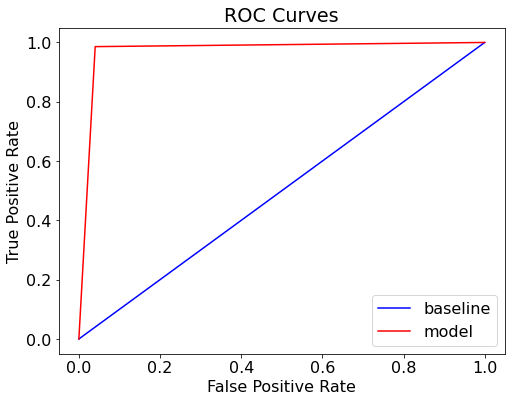

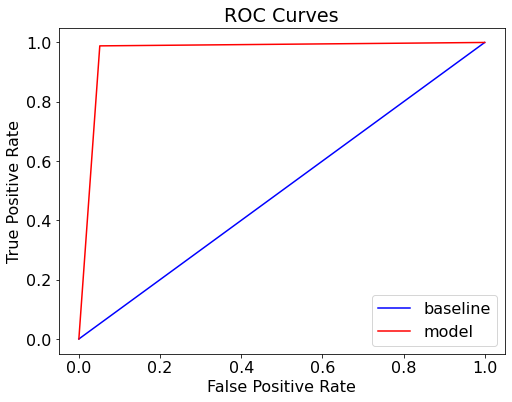

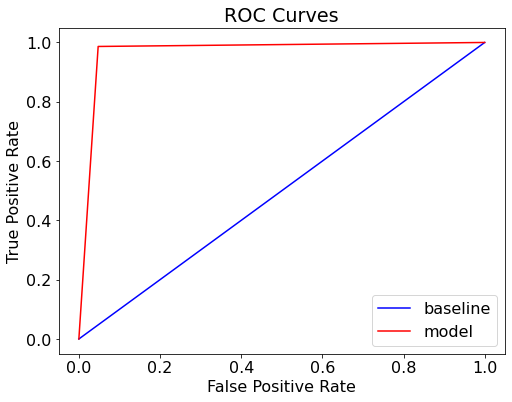

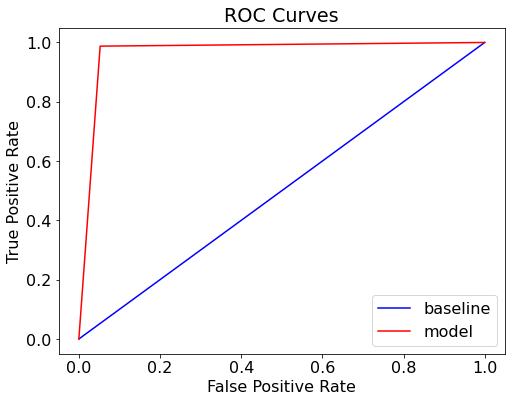

In [33]:
clf = xgb_clf = XGBClassifier(learning_rate=0.3,
                        n_estimators=190,         # 树的个数--1000棵树建立xgboost
                        max_depth=9,               # 树的深度
                        min_child_weight = 0.5,      # 叶子节点最小权重
                        gamma=0.5,                  # 惩罚项中叶子结点个数前的参数
                        subsample=0.7,             # 随机选择80%样本建立决策树
#                         colsample_btree=0.8,       # 随机选择80%特征建立决策树
                        objective='binary:logistic',# 指定损失函数
                        scale_pos_weight = 1,
                        max_delta_step = 1,
                       eval_metric = 'logloss'
#                            eval_metric =   'mlogloss'
                                                  
                       )
folds = 4
skfolds = StratifiedKFold(n_splits=folds,random_state=200,shuffle=True)#k折叠交叉验证

accuracy_count = 0.0
precision_count = 0.0
recall_count = 0.0
f1_count = 0.0
auc_count = 0.0

for train_index,test_index in skfolds.split(X,labels):
    clone_clf = clone(clf)
    X_train_folds = X[train_index]
    y_train_folds = labels[train_index]
    X_test_fold = X[test_index]
    y_test_fold = labels[test_index]
    
    clone_clf.fit(X_train_folds,y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred==y_test_fold)
    accuracy = n_correct/len(y_pred)
    accuracy_count += accuracy

    precision = precision_score(y_test_fold,y_pred)
    precision_count += precision
    
    recall = recall_score(y_test_fold,y_pred)
    recall_count += recall
   
    f1score = f1_score(y_test_fold,y_pred)
    f1_count += f1score 
    
    aucscore = roc_auc_score(y_test_fold,y_pred)
    auc_count += aucscore
    
    base_fpr, base_tpr, _ = roc_curve(y_test_fold, [1 for _ in range(len(y_test_fold))])
    model_fpr, model_tpr, _ = roc_curve(y_test_fold, y_pred)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');



#得到交叉验证后的平均结果
print("accuracy : " + str(accuracy_count/folds))
print("f1_score : "+ str(f1_count/folds))
print("recall : "+ str(recall_count/folds))
print("precision : "+ str(precision_count/folds))
print("auc_score : "+ str(auc_count/folds))

### 查看模型参数

In [180]:
clf.fit(X,labels)

F:\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0.5, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.3, max_delta_step=1,
              max_depth=9, min_child_weight=0.5, missing=nan,
              monotone_constraints='()', n_estimators=190, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.7, tree_method='exact',
              validate_parameters=1, verbosity=None)